# Modelling using supervised-learning

The end goal is to predict the price per night of a airbnb location depending on several features. 

We will use the dataset cleaned and preprocessed for modelling (scaling and RFE feature engineering methods). 

Models to build and compare:
- Linear Regression
- KNN
- RandomForest

**Steps:**
- Build train/test sample data 
- Build models
- Get evaluation metrics for each models
- Compare them

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
sns.set()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../data/airbnb_paris_clean_RFE.csv')
print(df.shape)
df.head()

(62799, 21)


,accommodates,bathrooms,bedrooms,guests_included,availability_365,number_of_reviews,neighbourhood_cleansed_Bourse,neighbourhood_cleansed_Hôtel-de-Ville,neighbourhood_cleansed_Louvre,neighbourhood_cleansed_Luxembourg,...,neighbourhood_cleansed_Panthéon,neighbourhood_cleansed_Passy,neighbourhood_cleansed_Temple,neighbourhood_cleansed_Élysée,property_type_Hotel,property_type_Serviced apartment,room_type_Private room,room_type_Shared room,cancellation_policy_super_strict_30,price
0,0.466667,0.666667,0.75,0.333333,0.778082,0.034360,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2.56
1,0.133333,0.333333,0.25,0.000000,0.013699,0.017773,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.85
2,0.200000,0.333333,0.25,0.000000,0.934247,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.88
3,0.066667,0.333333,0.25,0.000000,0.084932,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.92
4,0.066667,0.333333,0.00,0.000000,0.854795,0.004739,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.85


__________________
### Models set-up & train/test sampling

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing

In [4]:
def mape(y_true,y_pred):
    if y_true.any() == 0:
        return "dividing by 0 is impossible"
    else:
        return np.mean(np.abs((y_true-y_pred)/y_pred))*100

In [5]:
X = df.drop('price', axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# Creating several samples to test overfitting of models
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=15)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)

(43959, 20) (43959,)


_________________
### Linear Regression

In [7]:
# building the model
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
print('R^2 score for X_train:', model_lin.score(X_train, y_train),'\n')

# predicting values
y_pred_lin = model_lin.predict(X_test)

# checking evaluation metrics
print('R^2 score for X_test:',r2_score(y_test,y_pred_lin))
print('MSE:', mean_squared_error(y_test,y_pred_lin))
print('RMSE:', mean_squared_error(y_test,y_pred_lin, squared=False))
print('MAPE:',mape(y_test,y_pred_lin))

# Can't use RMSLE because of negavite predicted values
# print('RMSLE:',(mean_squared_log_error(y_test,abs(y_pred_lin))**0.5),'\n')


R^2 score for X_train: 0.515151627837205 

R^2 score for X_test: 0.5229495511758965
MSE: 0.15175224615174185
RMSE: 0.38955390660567357
MAPE: 29.355391768066003


In [14]:
unscaled_y = y_test*100
unscaled_y_pred = y_pred_lin*100

# checking evaluation metrics
print('R^2 score for X_test:',r2_score(unscaled_y,unscaled_y_pred))
print('MSE:', mean_squared_error(unscaled_y,unscaled_y_pred))
print('RMSE:', mean_squared_error(unscaled_y,unscaled_y_pred, squared=False))
print('MAPE:',mape(unscaled_y,unscaled_y_pred))

R^2 score for X_test: 0.5229495511758966
MSE: 1517.5224615174184
RMSE: 38.95539066056735
MAPE: 29.355391768065996


In [8]:
y_pred_lin[y_pred_lin<0]

array([-0.00426348, -0.07280805, -0.16111656])

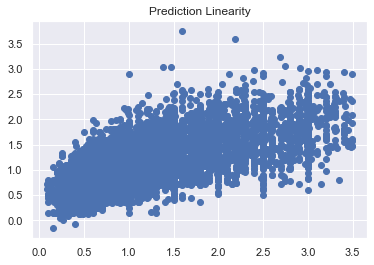

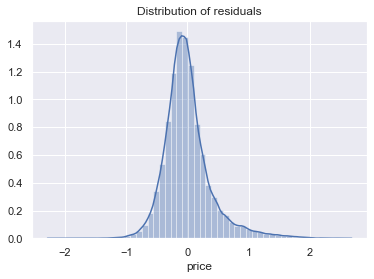

In [9]:
# Checking predictions
plt.scatter(y_test,y_pred_lin)
plt.title('Prediction Linearity')
plt.show()

# Checking residuals
resid=y_test-y_pred_lin

sns.distplot(resid)
plt.title('Distribution of residuals')
plt.show()

___________________
### KNN

In [11]:
# building model
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X_train, y_train)
print("Sample 1: X_train, X_test")
print('R^2 score for X_train:', model_knn.score(X_train, y_train),'\n')

# predicting values
y_pred_knn = model_knn.predict(X_test)

# checking evaluation metrics
print('R^2 score for X_test:', model_knn.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test,y_pred_knn))
print('RMSE:', mean_squared_error(y_test,y_pred_knn, squared=False))
print('MAPE:',mape(y_test,y_pred_knn))
print('RMSLE:',(mean_squared_log_error(y_test, y_pred_knn)**0.5),'\n')


## Testing with other samples

# building model
model_knn_2 = KNeighborsRegressor(n_neighbors=3)
model_knn_2.fit(X_train_2, y_train_2)
print("Sample 2: X_train_2, X_test_2")
print('R^2 score for X_train:', model_knn_2.score(X_train_2, y_train_2),'\n')

# predicting values
y_pred_knn_2 = model_knn_2.predict(X_test_2)

# checking evaluation metrics
print('R^2 score for X_test:', model_knn_2.score(X_test_2, y_test_2))
print('MSE:', mean_squared_error(y_test_2,y_pred_knn_2))
print('RMSE:', mean_squared_error(y_test_2,y_pred_knn_2, squared=False))
print('MAPE:',mape(y_test_2,y_pred_knn_2))
print('RMSLE:',(mean_squared_log_error(y_test_2, y_pred_knn_2)**0.5),'\n')


## Testing with other samples

# building model
model_knn_3 = KNeighborsRegressor(n_neighbors=3)
model_knn_3.fit(X_train_3, y_train_3)
print("Sample 3: X_train_3, X_test_3")
print('R^2 score for X_train:', model_knn_3.score(X_train_3, y_train_3),'\n')

# predicting values
y_pred_knn_3 = model_knn_3.predict(X_test_3)

# checking evaluation metrics
print('R^2 score for X_test:', model_knn_3.score(X_test_3, y_test_3))
print('MSE:', mean_squared_error(y_test_3,y_pred_knn_3))
print('RMSE:', mean_squared_error(y_test_3,y_pred_knn_3, squared=False))
print('MAPE:',mape(y_test_3,y_pred_knn_3))
print('RMSLE:',(mean_squared_log_error(y_test_3, y_pred_knn_3)**0.5),'\n')

R^2 score for X_train: 0.6606704737540453 

R^2 score for X_test: 0.4225318758213155
MSE: 0.18369563458362823
RMSE: 0.42859728718650125
MAPE: 31.7745579192313
RMSLE: 0.19035141168818304 

R^2 score for X_train: 0.6434921863840963 

R^2 score for X_test: 0.4128322345861189
MSE: 0.1819606587638594
RMSE: 0.42656846902210127
MAPE: 31.531480285582482
RMSLE: 0.19138563496854147 

R^2 score for X_train: 0.6604349652220819 

R^2 score for X_test: 0.4247790373643759
MSE: 0.18245019698041992
RMSE: 0.4271418932631403
MAPE: 32.229972902831456
RMSLE: 0.19122368844224832 



In [12]:
# Creating a for loop to find the best n_neighbors [WARNING BEFORE RUNNING - IT TAKES TIME]

r_score_train = [] # Storing results in list
r_score_test = []
rmse_test = []

for i in range(3,21,2):
    # building model
    model_knn = KNeighborsRegressor(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    print('Number of neighbors:',i)
    print('R^2 score for X_train:', model_knn.score(X_train, y_train),'\n')
    r_score_train.append(model_knn.score(X_train, y_train))
    
    # predicting values
    y_pred_knn = model_knn.predict(X_test)

    # checking evaluation metrics
    r_score_test.append(model_knn.score(X_test, y_test))
    print('R^2 score for X_test:', model_knn.score(X_test, y_test))
    print('MSE:', mean_squared_error(y_test,y_pred_knn))
    rmse_test.append(mean_squared_error(y_test,y_pred_knn, squared=False))
    print('RMSE:', mean_squared_error(y_test,y_pred_knn, squared=False))
    print('MAPE:',mape(y_test,y_pred_knn))
    print('RMSLE:',(mean_squared_log_error(y_test, y_pred_knn)**0.5),'\n')

R^2 score for X_train: 0.6606704737540453 

R^2 score for X_test: 0.4225318758213155
MSE: 0.18369563458362823
RMSE: 0.42859728718650125
MAPE: 31.7745579192313
RMSLE: 0.19035141168818304 

R^2 score for X_train: 0.6249767812276004 

R^2 score for X_test: 0.4800926870872267
MSE: 0.16538523906581742
RMSE: 0.4066758402780001
MAPE: 30.137256802414704
RMSLE: 0.1805697390885791 

R^2 score for X_train: 0.604636286388994 

R^2 score for X_test: 0.49879525099220046
MSE: 0.15943585553966808
RMSE: 0.3992941967267594
MAPE: 29.423619808922002
RMSLE: 0.17694062073361458 

R^2 score for X_train: 0.5948007574734312 

R^2 score for X_test: 0.5098455536961135
MSE: 0.15592069637755235
RMSE: 0.39486794802509906
MAPE: 29.036592801020234
RMSLE: 0.17479571105819927 

R^2 score for X_train: 0.5860352337329635 

R^2 score for X_test: 0.5187578644419701
MSE: 0.1530856436542612
RMSE: 0.391261605136846
MAPE: 28.70410769836944
RMSLE: 0.17292382981070958 

R^2 score for X_train: 0.5799764535082501 

R^2 score for X

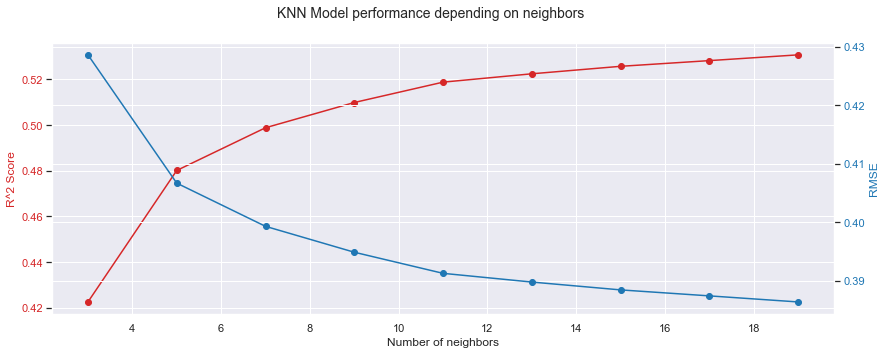

In [22]:
# Drawing graph to show the result model performance depending on the number neighbors

nb_neighbors = list(range(3,21,2))

fig, ax1 = plt.subplots(figsize=(14,5))

color = 'tab:red'
ax1.plot(nb_neighbors, r_score_test, linestyle='-', marker='o', color=color)
ax1.set_xlabel('Number of neighbors')
ax1.set_ylabel('R^2 Score', color=color)
ax1.tick_params(axis='y', labelcolor=color)

#y0, y1 = ax1.get_ylim()
#ax1.vlines(x=23,ymin=y0,ymax=y1, linestyle='dashed', label='Best Shape = [20,23]')
#ax1.vlines(x=20,ymin=y0,ymax=y1, linestyle='dashed')
#ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('RMSE', color=color)
ax2.plot(nb_neighbors, rmse_test, linestyle='-', marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('KNN Model performance depending on neighbors', fontsize=14)
plt.savefig('../img/KNN_model_performance.png')
plt.show()

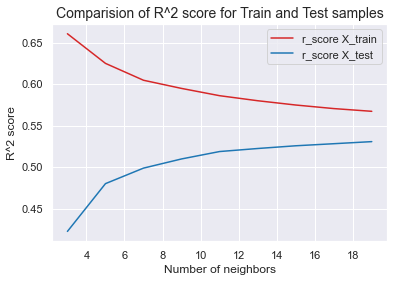

In [24]:
# Creating another visualization to show the overfitting effect 

plt.plot(nb_neighbors, r_score_train, color='tab:red', label='r_score X_train')
plt.plot(nb_neighbors, r_score_test, color='tab:blue', label='r_score X_test')
plt.xlabel('Number of neighbors')
plt.ylabel('R^2 score')
plt.title('Comparision of R^2 score for Train and Test samples', fontsize=14)
plt.legend()
plt.savefig('../img/comparison_rscore_KNN.png')
plt.show()

In [28]:
# Rebuilding the best model

model_knn = KNeighborsRegressor(n_neighbors=19)
model_knn.fit(X_train, y_train)
print('R^2 score for X_train:', model_knn.score(X_train, y_train),'\n')

# predicting values
y_pred_knn = model_knn.predict(X_test)

# checking evaluation metrics
print('R^2 score for X_test:', model_knn.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test,y_pred_knn))
print('RMSE:', mean_squared_error(y_test,y_pred_knn, squared=False))
print('MAPE:',mape(y_test,y_pred_knn))
print('RMSLE:',(mean_squared_log_error(y_test, y_pred_knn)**0.5),'\n')


# Testing with weights on distance
    
model_knn_w = KNeighborsRegressor(n_neighbors=19, weights='distance')
model_knn_w.fit(X_train, y_train)
print('R^2 score for X_train with weighted distance:', model_knn_w.score(X_train, y_train),'\n')

# predicting values
y_pred_knn_w = model_knn_w.predict(X_test)

# checking evaluation metrics
print('R^2 score for X_test with weighted distance:', model_knn_w.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test,y_pred_knn_w))
print('RMSE:', mean_squared_error(y_test,y_pred_knn_w, squared=False))
print('MAPE:',mape(y_test,y_pred_knn_w))
print('RMSLE:',(mean_squared_log_error(y_test, y_pred_knn_w)**0.5),'\n')

R^2 score for X_train: 0.5672216091286596 

R^2 score for X_test: 0.5307085905738224
MSE: 0.14928405508407291
RMSE: 0.3863729481784056
MAPE: 28.181757016097052
RMSLE: 0.17046005793567967 

R^2 score for X_train with weighted distance: 0.8803435834378053 

R^2 score for X_test with weighted distance: 0.49823217461399055
MSE: 0.15961497308448738
RMSE: 0.3995184264642713
MAPE: 29.306470336081542
RMSLE: 0.1768163621517934 



In [34]:
y_pred_knn[y_pred_knn<0]

array([], dtype=float64)

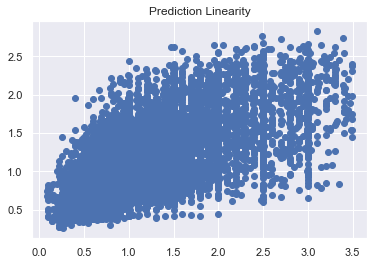

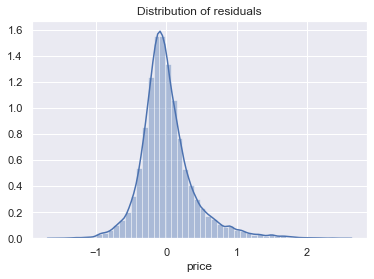

In [33]:
# Checking predictions
plt.scatter(y_test,y_pred_knn)
plt.title('Prediction Linearity')
plt.show()

# Checking residuals
resid=y_test-y_pred_knn

sns.distplot(resid)
plt.title('Distribution of residuals')
plt.show()

____________________
### RandomForest

In [39]:
# Testing Random Forest 

    # building the model with default estimator
    
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
print("R^2 score for X_train:", model_rf.score(X_train, y_train),'\n')

# predicting values 
y_pred_rf = model_rf.predict(X_test)

# checking evaluation metrics
print('R^2 score for X_test:', model_rf.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test,y_pred_rf))
print('RMSE:', mean_squared_error(y_test,y_pred_rf, squared=False))
print('MAPE:',mape(y_test,y_pred_rf))
print('RMSLE:',(mean_squared_log_error(y_test, y_pred_rf)**0.5),'\n')


    # building the model with estimator = 1000
    
model_rf_2 = RandomForestRegressor(n_estimators=1000)
model_rf_2.fit(X_train, y_train)
print("R^2 score for X_train:", model_rf_2.score(X_train, y_train),'\n')

# predicting values 
y_pred_rf_2 = model_rf_2.predict(X_test)

# checking evaluation metrics
print('R^2 score for X_test:', model_rf_2.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test,y_pred_rf_2))
print('RMSE:', mean_squared_error(y_test,y_pred_rf_2, squared=False))
print('MAPE:',mape(y_test,y_pred_rf_2))
print('RMSLE:',(mean_squared_log_error(y_test, y_pred_rf_2)**0.5),'\n')

R^2 score for X_train: 0.8327332395707696 

R^2 score for X_test: 0.49465441834529617
MSE: 0.16075307609077563
RMSE: 0.4009402400492817
MAPE: 29.009006817897582
RMSLE: 0.17752139426481037 

R^2 score for X_train: 0.8345585380667571 

R^2 score for X_test: 0.4982702302694402
MSE: 0.15960286738118604
RMSE: 0.3995032758078287
MAPE: 28.956516288454942
RMSLE: 0.17699444093537317 



In [ ]:
plt.scatter(y_test,y_pred_rf)
plt.title('Prediction Linearity')
plt.show()

# Checking residuals

resid=y_test-y_pred_rf

sns.distplot(resid)
plt.title('Distribution of residuals')
plt.show()

In [37]:
df_original = pd.read_csv('../data/airbnb_paris_clean_wo_dummies_feat.csv')
print(df_original.shape)
df_original.head()

(62799, 21)


,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,guests_included,extra_people,availability_365,number_of_reviews,instant_bookable,cancellation_policy,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,time_since_host
0,within an hour,75-100%,0,0,Bourse,Apartment,Entire home/apt,0.466667,0.666667,0.75,...,2.56,0.333333,0.110701,0.778082,0.034360,1,strict_14_with_grace_period,0,0,0.419394
1,within an hour,75-100%,0,0,Temple,Apartment,Entire home/apt,0.133333,0.333333,0.25,...,0.85,0.000000,0.000000,0.013699,0.017773,0,moderate,0,0,0.058622
2,within an hour,75-100%,0,0,Bourse,Apartment,Entire home/apt,0.200000,0.333333,0.25,...,0.88,0.000000,0.000000,0.934247,0.000000,1,strict_14_with_grace_period,0,0,0.244993
3,within an hour,75-100%,0,0,Buttes-Montmartre,Apartment,Entire home/apt,0.066667,0.333333,0.25,...,0.92,0.000000,0.000000,0.084932,0.000000,0,flexible,0,0,0.438202
4,within a few hours,75-100%,0,1,Buttes-Montmartre,Apartment,Entire home/apt,0.066667,0.333333,0.00,...,0.85,0.000000,0.000000,0.854795,0.004739,0,flexible,0,0,0.292135


In [38]:
# Building samples
X_orig = df_original.drop('price',axis=1)
y_orig = df_original.price

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.3, random_state=8)

# building the model 
model_rf = RandomForestRegressor()
model_rf.fit(X_train_orig, y_train_orig)
print("R^2 score for X_train:", model_rf.score(X_train_orig, y_train_orig),'\n')

# predicting values 
y_pred_rf = model_rf.predict(X_test_orig)

# checking evaluation metrics
print('R^2 score for X_test:', model_rf.score(X_test_orig, y_test_orig))
print('MSE:', mean_squared_error(y_test_orig,y_pred_rf))
print('RMSE:', mean_squared_error(y_test_orig,y_pred_rf, squared=False))
print('MAPE:',mape(y_test_orig,y_pred_rf))
print('RMSLE:',(mean_squared_log_error(y_test_orig, y_pred_rf)**0.5),'\n')



ValueError: could not convert string to float: 'None'

### Comments

- At first sight Linear Regression and KNeighbors are the best model because they have almost the same result, although Linear Regression it is not overfitted (from the beginning), but all assumptions aren't met.
- In the meantime, the Linear Regression predicted negative values (is it wrong?)
- The models seems to be overfitted on the trained sample for KNN and Random Forest models even though I managed to reduce the overfitting in KNN by increasing the number of neighbors
- The RMSE score doble from MSE that it is due to outliers still in the dataset

**Possible improvements:**
- Try Random Forest with dataset without dummies
- Try other preprocessing methods (Sequential Selection, PCA and other scaling) to improve the resutls
- Try Embedded feature engineering methods (Lasso)

**Next Steps:**
- ~~Check why there are negative values in prediction values~~
- ~~Change scaling method for Price~~
- ~~Confirm the overfitting of models~~
- Fix Random Forest without dummies
- ~~Try Random Forest with an estimator = 1000~~
- ~~Build a for loop to find the best n_neighbors for KNN (between 3 and 21)~~
- Check assumptions of each models